In [1]:
from umap import UMAP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import colorcet as cc


from cuml.cluster import KMeans as cuKMeans
from sklearn.cluster import KMeans


def load_result(dir_path, ensemble_size=5):
    pred_res_list = []
    for i in range(ensemble_size):
        pred_res_path = dir_path + f"final_result_{i+1}.csv"
        print("loading", pred_res_path)
        pred_res = pd.read_csv(pred_res_path)
        # change pred_result to pred_result_1, pred_result_2, ...
        pred_res.columns = [f"{col}_{i+1}" if col != "smi_name" else col for col in pred_res.columns]
        pred_res_list.append(pred_res)
    return pred_res_list
        


embedding_dir = "/home/sdl/SDL-LNP/model/evaluation/notebooks/"
data_dir = "/home/sdl/SDL-LNP/model/serverless/test/"


embeddings_path = embedding_dir + "test_result_representation.npz"


pred_res_list = load_result(data_dir)
pred_res = pd.concat(pred_res_list, axis=1, join="outer")
with np.load(embeddings_path) as data:
    embeddings = data["arr_0"]
    
# keep only one smi_name column
pred_res = pred_res.loc[:, ~pred_res.columns.duplicated()]
mean_pred_res = pred_res.groupby("smi_name").mean()
# get mean embedding with same smi_name
smi_names = pred_res["smi_name"].unique()
embeddings_df = pd.DataFrame(embeddings, index=pred_res["smi_name"])
# mean_embeddings = embeddings_df.groupby("smi_name").mean()

# get first embedding with same smi_name
mean_embeddings = embeddings_df.groupby("smi_name").first()

MAPPING_PATH = "/home/sdl/SDL-LNP/model/data_process/220k_library.csv"
mapping_df = pd.read_csv(MAPPING_PATH)
NAME_SMI_PATH = "/home/sdl/SDL-LNP/mapping_table/General_mapping_sampler.csv"
name_smi_df = pd.read_csv(NAME_SMI_PATH)


mapping_df["A_name"] = mapping_df["A_smiles"].map(name_smi_df.set_index('Reagent SMILES')['Reagent Name'])
mapping_df["B_name"] = mapping_df["B_smiles"].map(name_smi_df.set_index('Reagent SMILES')['Reagent Name'])
mapping_df["C_name"] = mapping_df["C_smiles"].map(name_smi_df.set_index('Reagent SMILES')['Reagent Name'])
mapping_df["D_name"] = mapping_df["D_smiles"].map(name_smi_df.set_index('Reagent SMILES')['Reagent Name'])


mean_pred_res = pred_res.groupby("smi_name").mean()
# get mean embedding with same smi_name
smi_names = pred_res["smi_name"].unique()
embeddings_df = pd.DataFrame(embeddings, index=pred_res["smi_name"])
# mean_embeddings = embeddings_df.groupby("smi_name").mean()

# get first embedding with same smi_name
mean_embeddings = embeddings_df.groupby("smi_name").first()


loading /home/sdl/SDL-LNP/model/serverless/test/final_result_1.csv
loading /home/sdl/SDL-LNP/model/serverless/test/final_result_2.csv
loading /home/sdl/SDL-LNP/model/serverless/test/final_result_3.csv
loading /home/sdl/SDL-LNP/model/serverless/test/final_result_4.csv
loading /home/sdl/SDL-LNP/model/serverless/test/final_result_5.csv


In [2]:
pred_res

smi_name  pred_result_1  \
0        CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...       0.755104   
1        CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...       0.755104   
2        CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...       1.010987   
3        CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...       0.422476   
4        CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...       1.250845   
...                                                    ...            ...   
2433019  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC(C)(C)CC(C)(C)...       0.765568   
2433020  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC(C)(C)CC(C)(C)...       0.412560   
2433021  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC(C)(C)CC(C)(C)...       0.917001   
2433022  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC(C)(C)CC(C)(C)...       0.407058   
2433023  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC(C)(C)CC(C)(C)...       3.340065   

         pred_result_2  pred_result_3  pred_result_4  pred_result_5  
0             1.180253       0.566445       1.152085       1.642708  
1             1.180253       0.566445       1.152085       1.642708  
2             1.143296      -0.477646       0.482726       1.285019  
3             2.135840       0.588561       0.552044       1.518345  
4             1.372033       0.397334       1.106335       1.975692  
...                ...            ...            ...            ...  
2433019       0.363380       1.405130       0.748926       1.635752  
2433020       0.685831       1.406335       1.374213       1.211392  
2433021       0.904578       2.870247       0.238566       1.737333  
2433022       0.387861       1.626304      -0.379520       0.917173  
2433023       1.435868       2.256014       4.016054       4.800240  

[2433024 rows x 6 columns]

In [3]:
# mean reduction of ensemble pred_res
mean_pred_res = pred_res.groupby("smi_name").mean()

In [4]:
predictive_variance = mean_pred_res.var(axis=1)

Text(0.5, 1.0, 'mean')

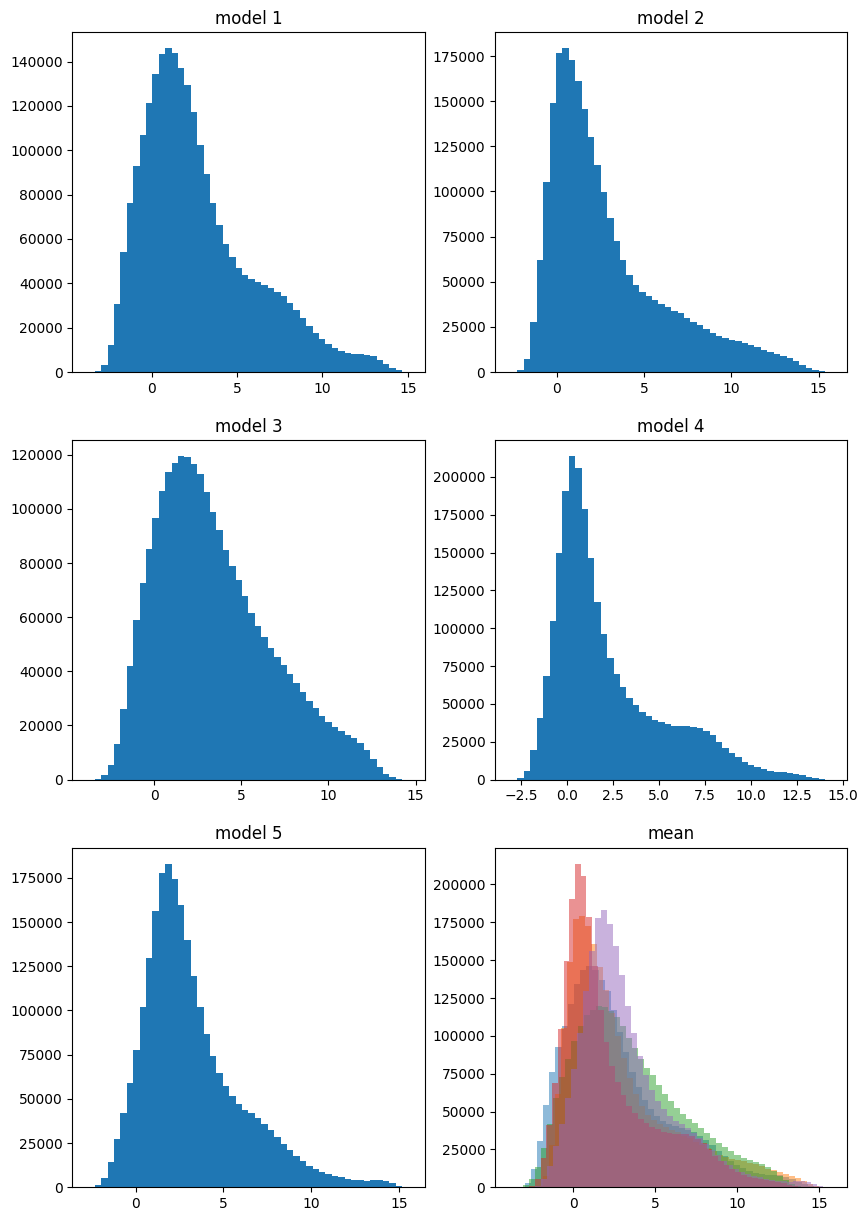

In [5]:
# plot the distribution for each model

# 6 plot: 5 for each model, 1 for mean

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

for i in range(1, 6):
    ax = axs[(i-1)//2, (i-1)%2]
    ax.hist(pred_res[f"pred_result_{i}"], bins=50)
    ax.set_title(f"model {i}")

ax = axs[2, 1]

for i in range(1,6):
    ax.hist(pred_res[f"pred_result_{i}"], bins=50, alpha=0.5)
ax.set_title("gathered")


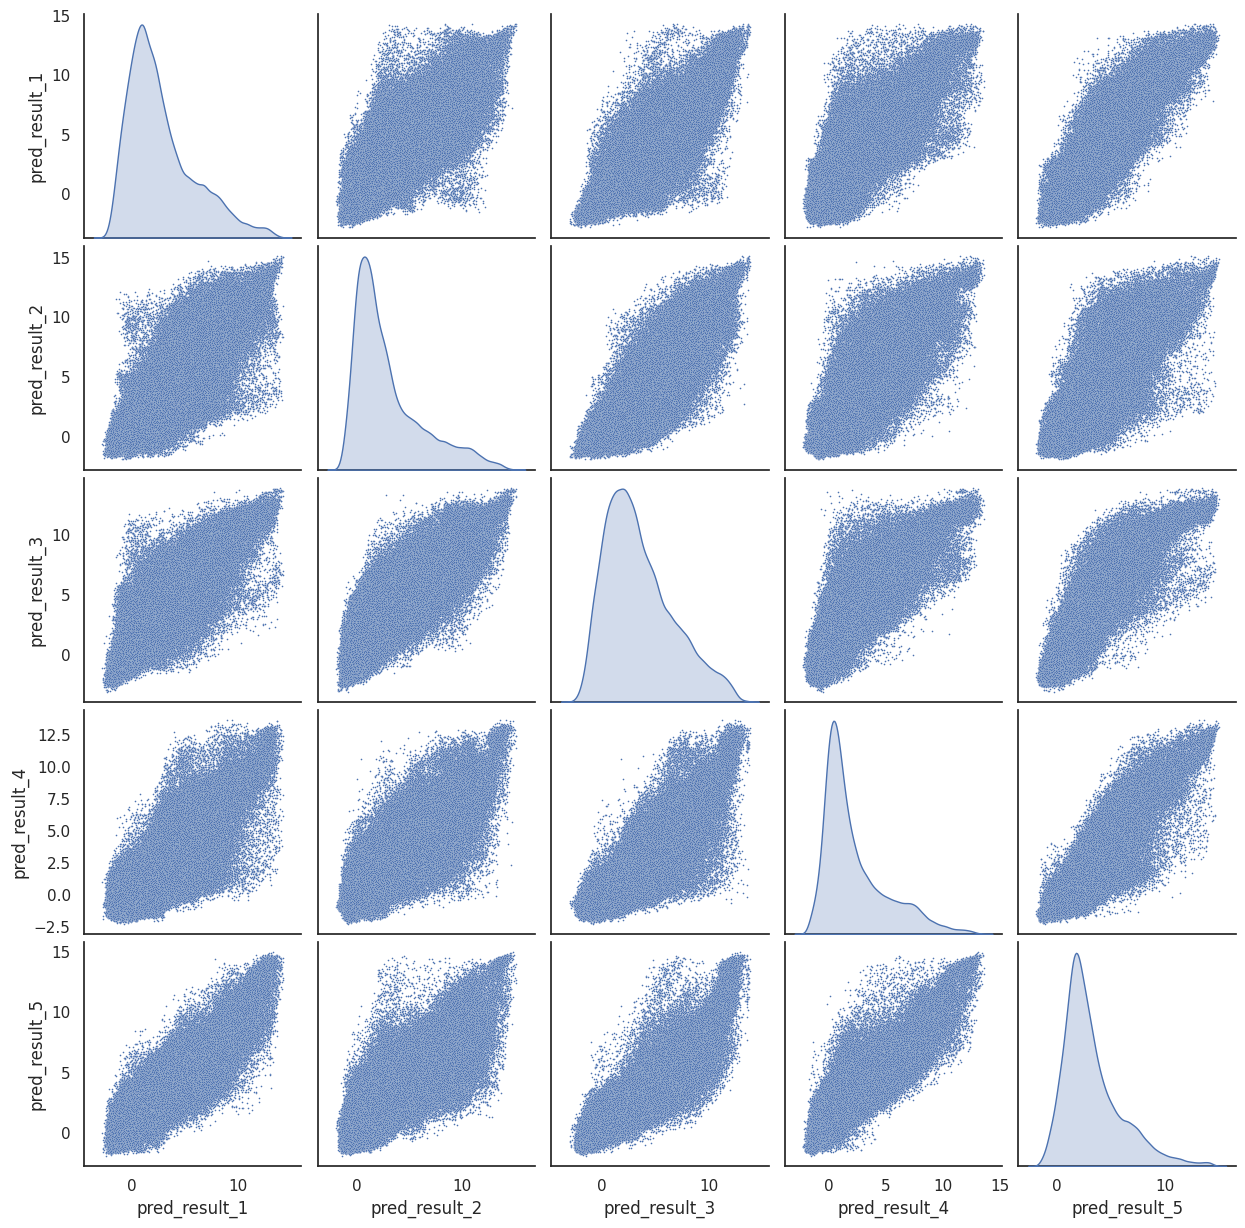

In [6]:
# plot grid of df
sns.set_theme(style="white")

df = mean_pred_res

sns.pairplot(df, diag_kind="kde", plot_kws={"s": 1.5})
# plot 

In [7]:
top_10_best = mean_pred_res.mean(axis=1).sort_values(ascending=False).head(int(0.1*len(mean_pred_res))).index
top_10_best

Index(['C#CCCCCCCCCC(=O)N(C1CCN(C)CC1)C(CCCCCOC(=O)C(CCCCCC)CCCCCCCC)C(=O)NC1CCCCC1',
       'CCCCCCCCC(=O)N(C1CCN(C)CC1)C(CCCCCOC(=O)C(CCCCCC)CCCCCCCC)C(=O)NC1CCCCC1',
       'CCCCCCCCCCCCCCCC(=O)N(C1CCN(C)CC1)C(CCCCC)C(=O)NC1CCCCC1',
       'CCCCCCCCCCC(=O)N(C1CCN(C)CC1)C(CCCCCOC(=O)C(CCCC)CCCCCC)C(=O)NC1CCCCC1',
       'CCCCCCCCCCCCCCCC(=O)N(C1CCN(C)CC1)C(CCCCCC)C(=O)NC1CCCCC1',
       'CCCCCCCCCCC(=O)N(C1CCN(C)CC1)C(CCCCCOC(=O)C(CCCCCC)CCCCCCCC)C(=O)NC1CCCCC1',
       'C#CCCCCCCCCC(=O)N(C1CCN(C)CC1)C(CCCCCOC(=O)C(CCCC)CCCCCC)C(=O)NC1CCCCC1',
       'C=CCCCCCCCCC(=O)N(C1CCN(C)CC1)C(CCCCCOC(=O)C(CCCCCC)CCCCCCCC)C(=O)NC1CCCCC1',
       'CCCCCCCC/C=C\CCCCCCCC(=O)N(C1CCN(C)CC1)C(CCCCC)C(=O)NC1CCCCC1',
       'CCCCC/C=C\C/C=C\CCCCCCCC(=O)N(C1CCN(C)CC1)C(CCCCC)C(=O)NC1CCCCC1',
       ...
       'CCCCCCCC/C=C\CCCCCCCC(=O)N(C1CCC(N(C)C)CC1)C(CCCCCOC(=O)C(CCCCCC)CCCCCCCC)C(=O)NCn1nnc2ccccc21',
       'CCCCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN1CCNCC1)C(=O)CCCCC(=O)OC(CCCCCCCC)CCCCCCCC',
       'CCCC

<Axes: ylabel='Density'>

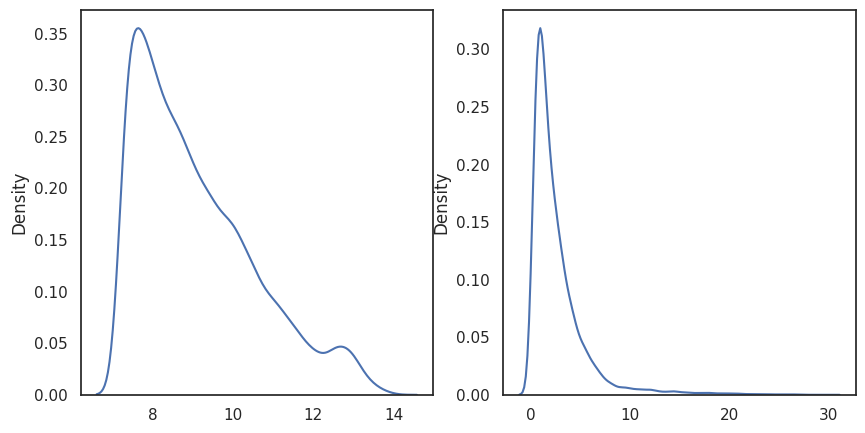

In [8]:
# top 10% the best samples, plot the distribution of pred_result, and their predictive variance



fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# kde of pred_result
sns.kdeplot(mean_pred_res.loc[top_10_best].mean(axis=1), ax=axs[0])

# kde of var
sns.kdeplot(predictive_variance.loc[top_10_best], ax=axs[1])




In [9]:
mapping_df

id                                combined_mol_SMILES  \
0            0  CCCCCC(C(=O)NC)N(CCN(C)C)C(=O)CC12C[C@H]3C[C@@...   
1            1  CCCCCC(C(=O)NC)N(CCN(C)C)C(=O)C[C@@]12C[C@@H]3...   
2            2           CCCCCC(C(=O)NC)N(CCN(C)C)C(=O)CCN1CCCCC1   
3            3               CCCCCC(C(=O)NC)N(CCN(C)C)C(=O)CN(C)C   
4            4              CCCCCC(C(=O)NC)N(CCN(C)C)C(=O)CCN(C)C   
...        ...                                                ...   
221179  221179  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC12C[C@H]3C[C@@...   
221180  221180  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC12C[C@H]3C[C@@...   
221181  221181  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC12C[C@H]3C[C@@...   
221182  221182  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC12C[C@H]3C[C@@...   
221183  221183  C=CCCCCCCCCCOC(=O)CCCCC(=O)N(CCCN1CCCCCC1)C(CC...   

             A_smiles                                      B_smiles  \
0            NCCN(C)C                                    C[N+]#[C-]   
1            NCCN(C)C                                    C[N+]#[C-]   
2            NCCN(C)C                                    C[N+]#[C-]   
3            NCCN(C)C                                    C[N+]#[C-]   
4            NCCN(C)C                                    C[N+]#[C-]   
...               ...                                           ...   
221179  NCCCN1CCCCCC1  [C-]#[N+]C1(C[C@@H]2C3)C[C@@H]3C[C@@H](C2)C1   
221180  NCCCN1CCCCCC1  [C-]#[N+]C1(C[C@@H]2C3)C[C@@H]3C[C@@H](C2)C1   
221181  NCCCN1CCCCCC1  [C-]#[N+]C1(C[C@@H]2C3)C[C@@H]3C[C@@H](C2)C1   
221182  NCCCN1CCCCCC1  [C-]#[N+]C1(C[C@@H]2C3)C[C@@H]3C[C@@H](C2)C1   
221183  NCCCN1CCCCCC1  [C-]#[N+]C1(C[C@@H]2C3)C[C@@H]3C[C@@H](C2)C1   

                          C_smiles  \
0                         CCCCCC=O   
1                         CCCCCC=O   
2                         CCCCCC=O   
3                         CCCCCC=O   
4                         CCCCCC=O   
...                            ...   
221179  CCCCC/C=C\C/C=C\CCCCCCCC=O   
221180  CCCCC/C=C\C/C=C\CCCCCCCC=O   
221181  CCCCC/C=C\C/C=C\CCCCCCCC=O   
221182  CCCCC/C=C\C/C=C\CCCCCCCC=O   
221183  CCCCC/C=C\C/C=C\CCCCCCCC=O   

                                             D_smiles       A_name  \
0            OC(CC(C1)(C2)C[C@@H]3C[C@H]2C[C@H]1C3)=O        D5616   
1       OC(C[C@@](C1)(C2)C[C@]3(O)C[C@H]2C[C@H]1C3)=O        D5616   
2                                    OC(CCN1CCCCC1)=O        D5616   
3                                        CN(CC(O)=O)C        D5616   
4                                       CN(CCC(O)=O)C        D5616   
...                                               ...          ...   
221179            CCCCCCCCC(OC(CCCCC(O)=O)=O)CCCCCCCC  TRC-A809785   
221180           CCC(CCC(OC(CCCCC(O)=O)=O)CC(C)C)CCCC  TRC-A809785   
221181                     OC(CCCCC(OCCCCCCCCCC)=O)=O  TRC-A809785   
221182                    OC(CCCCC(OCCCCCCCCCCC)=O)=O  TRC-A809785   
221183                   OC(CCCCC(OCCCCCCCCCC=C)=O)=O  TRC-A809785   

             B_name C_name       D_name  
0       TRC-I289721  H0133        A0736  
1       TRC-I289721  H0133        H1414  
2       TRC-I289721  H0133       335924  
3       TRC-I289721  H0133        D3585  
4       TRC-I289721  H0133        D2690  
...             ...    ...          ...  
221179        I0824  O0225  H1401+A0161  
221180        I0824  O0225  E0144+A0161  
221181        I0824  O0225  D0031+A0161  
221182        I0824  O0225  U0005+A0161  
221183        I0824  O0225  U0047+A0161  

[221184 rows x 10 columns]

In [10]:
def count_components(structures):
    res_list = []
    # structures is a list of smiles
    idx = mapping_df.index[mapping_df["combined_mol_SMILES"].isin(structures)].tolist()
    A = mapping_df.loc[idx, "A_name"]
    B = mapping_df.loc[idx, "B_name"]
    C = mapping_df.loc[idx, "C_name"]
    D = mapping_df.loc[idx, "D_name"]
    res_list.extend(A)
    res_list.extend(B)
    res_list.extend(C)
    res_list.extend(D)
    # count table for each unique A or unqiue B or unique C or unique D
    count_table = pd.DataFrame(res_list, columns=["reagent_name"]).value_counts().reset_index()
    return res_list, count_table

_, count_table = count_components(top_10_best)
count_table

reagent_name  count
0         C1438   5072
1         T1243   4745
2         B0821   4396
3         A0304   3196
4         C2959   2587
..          ...    ...
88        A1026      4
89        A0409      2
90        A3464      1
91        D0742      1
92    CDS002678      1

[93 rows x 2 columns]

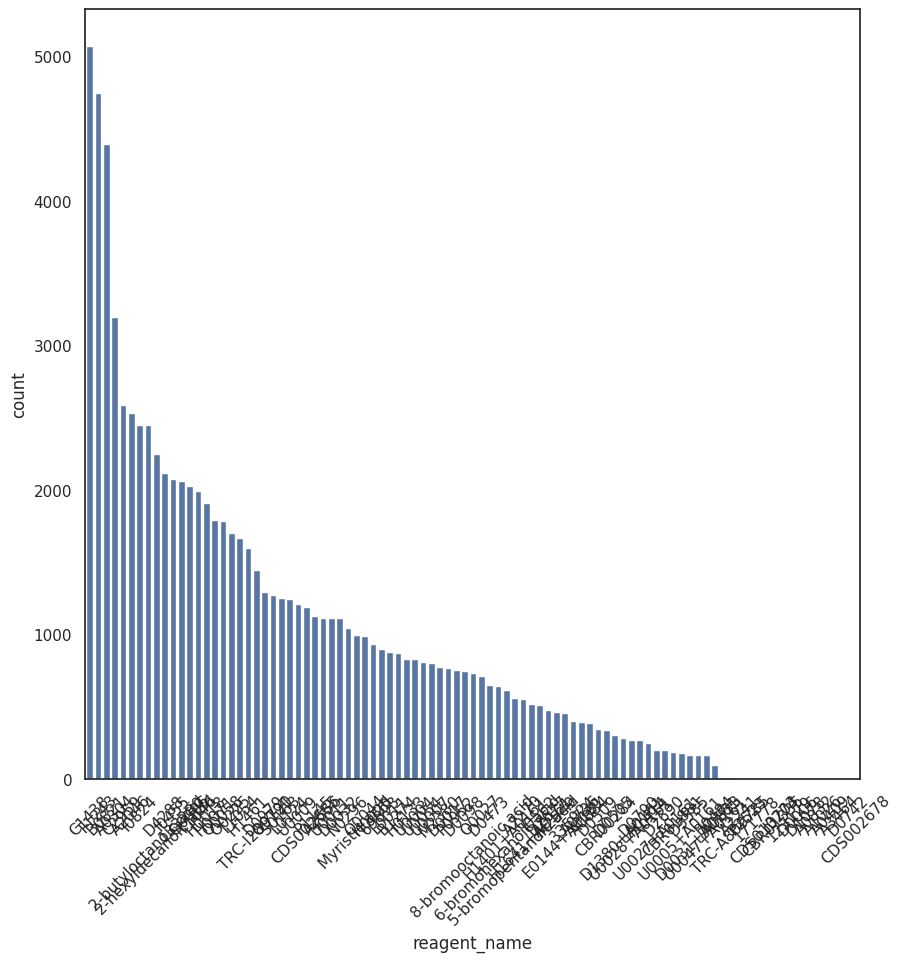

In [11]:
# plot it 
plt.figure(figsize=(10, 10))
sns.barplot(data=count_table, x="reagent_name", y="count")
# rotate x label
plt.xticks(rotation=45)
None

/home/sdl/miniconda3/envs/unimol/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


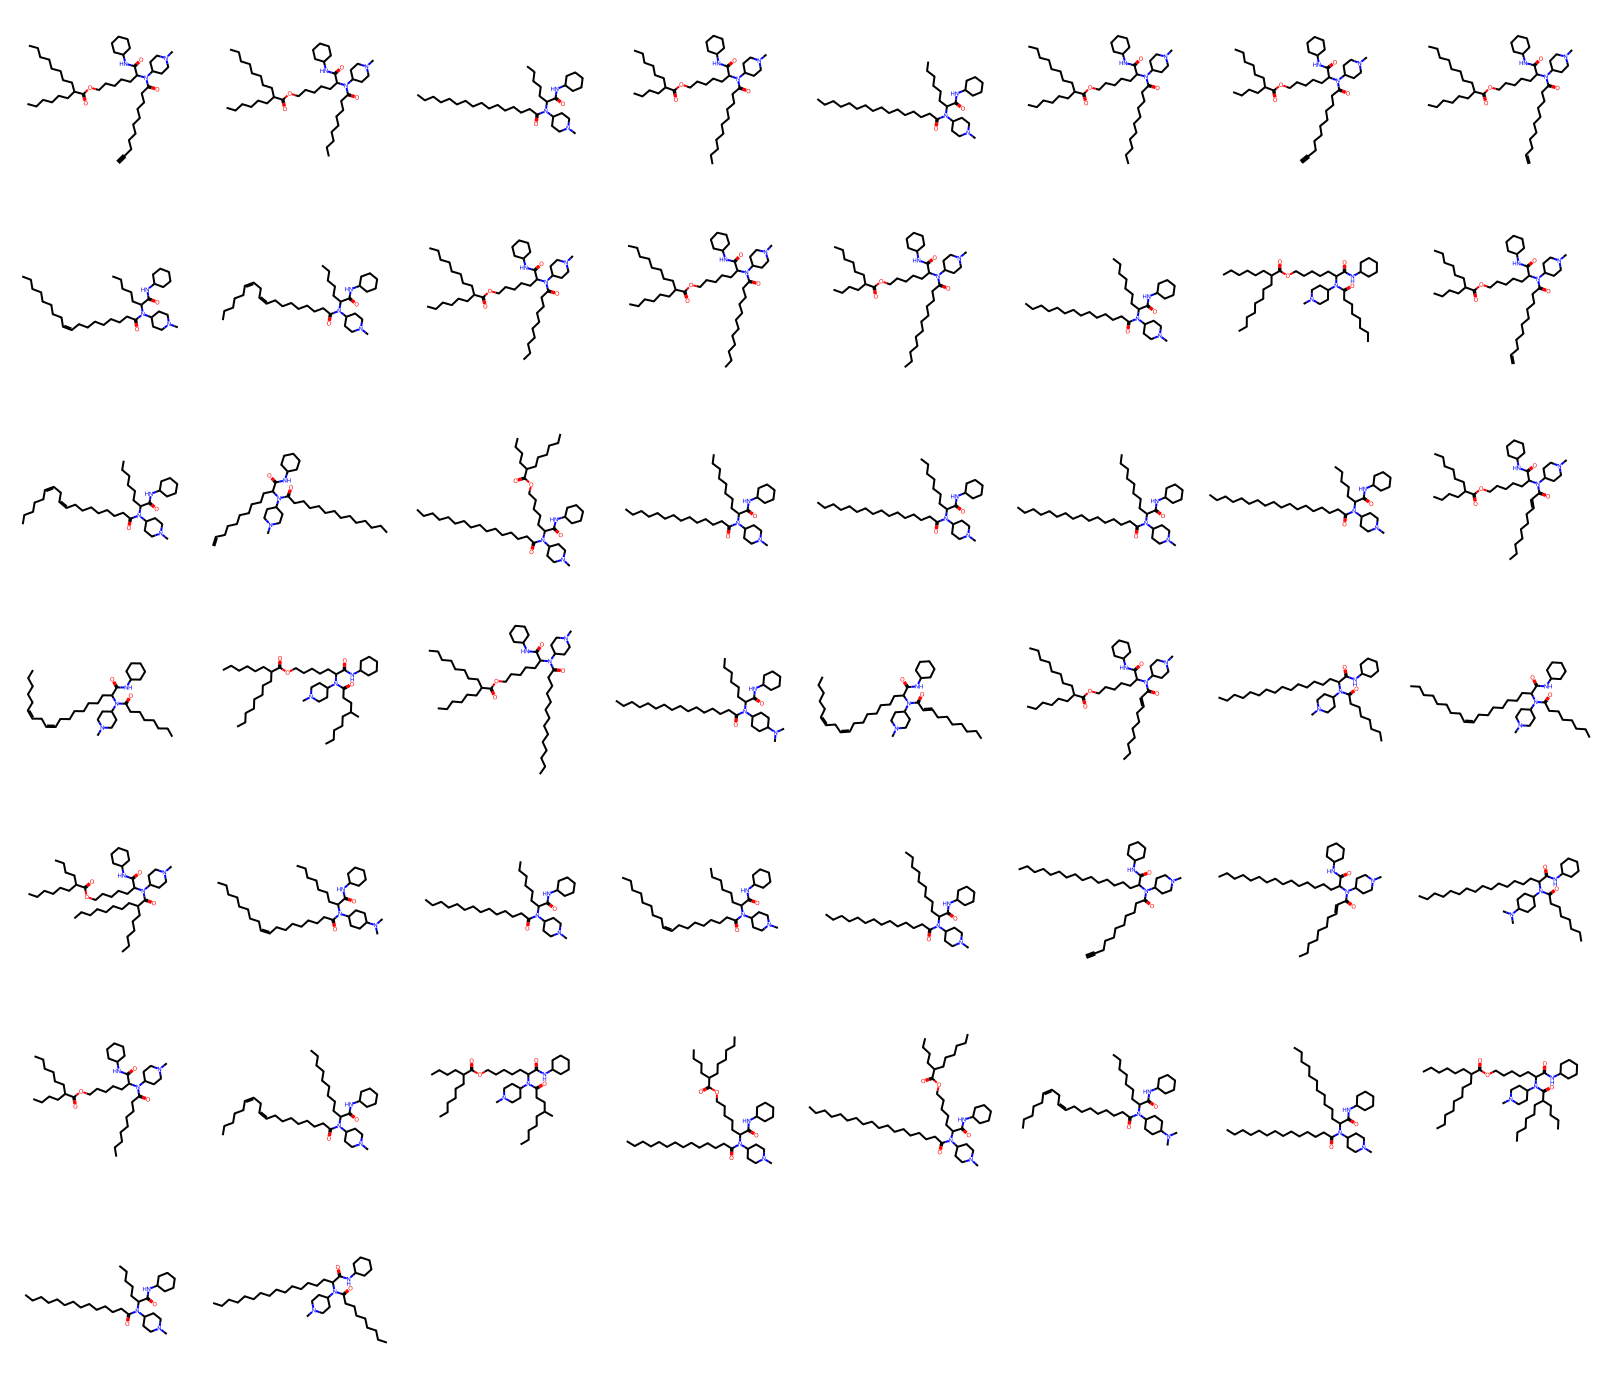

In [12]:
top_96_best = mean_pred_res.mean(axis=1).sort_values(ascending=False).head(96).index

# get structures for the selected points


import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

# draw the structures, structures is a list of smiles
mols = [Chem.MolFromSmiles(smi) for smi in top_96_best]

Draw.MolsToGridImage(mols, molsPerRow=8, subImgSize=(200, 200))


In [13]:
_, count_table = count_components(top_96_best)
count_table



reagent_name  count
0                  C1438     96
1                  A2046     72
2                  D4288     21
3   2-butyloctanoic acid     17
4   2-hexyldecanoic acid     14
5                  L0124     14
6                  O0027     11
7                  O0225     11
8          Myristic acid     10
9                  P1145      9
10                 P0952      9
11                 H0025      9
12                 H0071      9
13                 H0133      8
14                 S0163      6
15                 O0058      6
16                 O0044      5
17                 D0032      5
18                 D0017      5
19                 U0004      4
20                 U0007      4
21                 O0190      4
22                 U0011      4
23                 N0296      4
24                 M2380      4
25                 D0098      4
26                 U0054      4
27                 L0011      3
28                 H0018      3
29                 U0009      3
30                 A0304      2
31                 O0006      1
32                 B0821      1
33                 D2677      1
34                 D0979      1

In [14]:


import plotly.express as px
from collections import Counter

def count_combination(structures):
    res_list = []
    # structures is a list of smiles
    idx = mapping_df.index[mapping_df["combined_mol_SMILES"].isin(structures)].tolist()
    A = mapping_df.loc[idx, "A_name"]
    B = mapping_df.loc[idx, "B_name"]
    C = mapping_df.loc[idx, "C_name"]
    D = mapping_df.loc[idx, "D_name"]
    
    for a, b, c, d in zip(A, B, C, D):
        res_list.append([a, b, c, d])
    # count table for each unique A or unqiue B or unique C or unique D
    return res_list

def plot_sankey(structures):
    data = count_combination(structures)
    counter = Counter(tuple(x) for x in data)
    df = pd.DataFrame(counter.items(), columns=["combination", "count"])
    df["A"] = df["combination"].apply(lambda x: x[0])
    df["B"] = df["combination"].apply(lambda x: x[1])
    df["C"] = df["combination"].apply(lambda x: x[2])
    df["D"] = df["combination"].apply(lambda x: x[3])


    
    fig = px.parallel_categories(df, dimensions=["A", "B", "C", "D"],)
    fig.show()
                              

def sampling(n_query, clusters, query_idx):
    sample_res = []
    idx2cluster_mapping = {idx: clusters[idx] for idx in query_idx}
    local_clusters = clusters[query_idx]
    cluster2size_mapping = {i: np.sum(local_clusters == i) for i in np.unique(local_clusters)}
    cluster2idx_mapping = {i: [] for i in np.unique(local_clusters)}
    for idx, cluster in idx2cluster_mapping.items():
        cluster2idx_mapping[cluster].append(idx)
    sorted_clusters = sorted(cluster2size_mapping.keys(), 
                             key=lambda x: cluster2size_mapping[x])
    # round robin sampling
    j = 0
    while len(sample_res) < n_query:
        cluster = sorted_clusters[j % len(sorted_clusters)]
        cluster_indices = cluster2idx_mapping[cluster]
        if len(cluster_indices) == 0:
            j += 1
            continue
        selected_idx = np.random.choice(cluster_indices, 1)[0]
        # remove selected index from cluster2idx_mapping
        cluster2idx_mapping[cluster].remove(selected_idx)
        cluster2size_mapping[cluster] -= 1
        sample_res.append(selected_idx)
        print(f"selected_idx: {selected_idx} from cluster {cluster}; cluster size: {cluster2size_mapping[cluster]+1}")
        j += 1
    

    return sample_res

In [15]:
# plot sanky diagram for the top 96 best samples

plot_sankey(top_96_best)

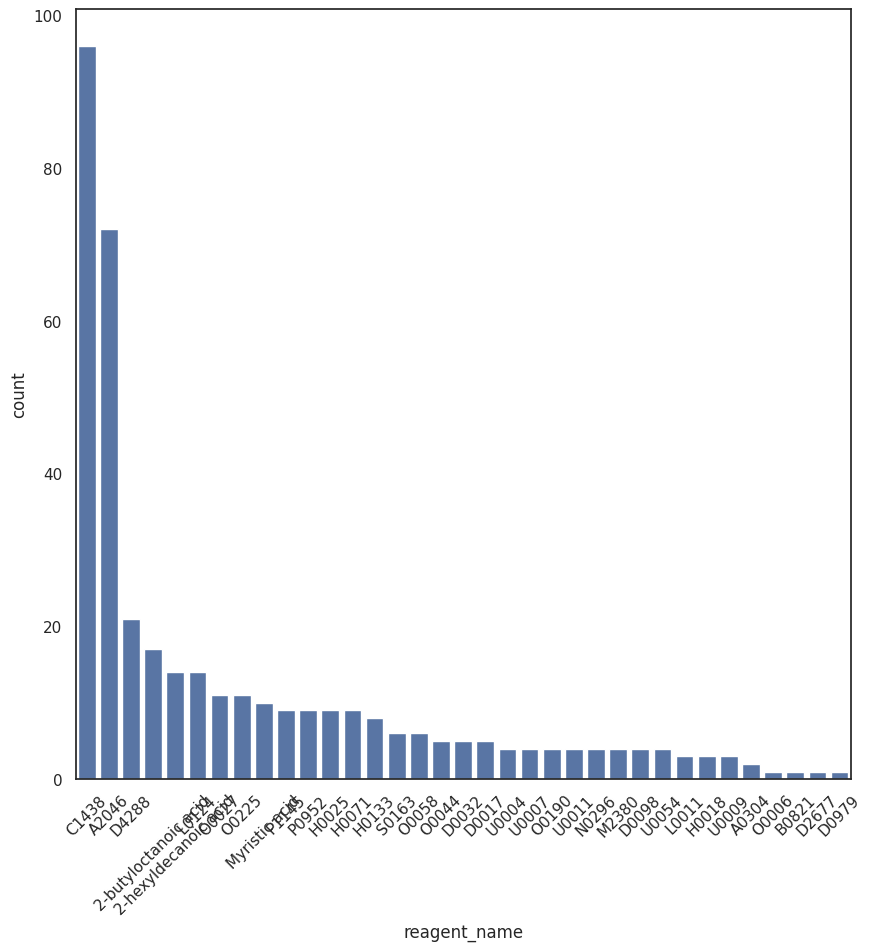

In [16]:
# plot it 
plt.figure(figsize=(10, 10))
sns.barplot(data=count_table, x="reagent_name", y="count")
# rotate x label
plt.xticks(rotation=45)
None

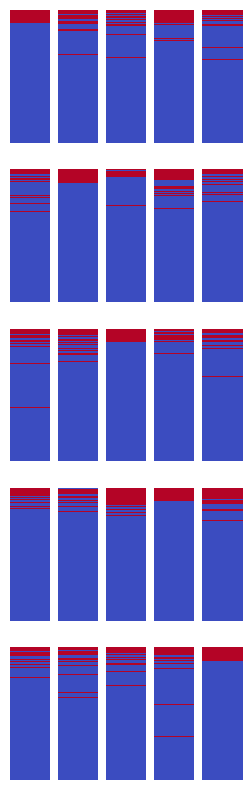

In [17]:
# five heat map for plotting the consistence of the ensemble

fig, axs = plt.subplots(5, 5, figsize=(3, 10))

top_n_r = 0.1


for k in range(1, 6):
    k_top_smi = mean_pred_res[f"pred_result_{k}"].sort_values(ascending=False).head(int(top_n_r * len(mean_pred_res))).index

    for i in range(1, 6):
        consistency = mean_pred_res[f"pred_result_{i}"].sort_values(ascending=False).index.isin(k_top_smi).astype(int).reshape(-1, 1)
        # plot the heatmap, no axis
        sns.heatmap(consistency, ax=axs[k-1, i-1],
                    cmap="coolwarm", cbar=False, xticklabels=False, yticklabels=False)

    

In [18]:
# check percentage alignment on top 1 0% of the prediction

# done by getting the smi with highest prediction for each model
# and check if they are the same


pred_res    
    

smi_name  pred_result_1  \
0        CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...       0.755104   
1        CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...       0.755104   
2        CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...       1.010987   
3        CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...       0.422476   
4        CCCCCCCCC(C(=O)NCCN1CCOCC1)N(CCN(CC)CC)C(=O)CN...       1.250845   
...                                                    ...            ...   
2433019  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC(C)(C)CC(C)(C)...       0.765568   
2433020  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC(C)(C)CC(C)(C)...       0.412560   
2433021  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC(C)(C)CC(C)(C)...       0.917001   
2433022  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC(C)(C)CC(C)(C)...       0.407058   
2433023  CCCCC/C=C\C/C=C\CCCCCCCC(C(=O)NC(C)(C)CC(C)(C)...       3.340065   

         pred_result_2  pred_result_3  pred_result_4  pred_result_5  
0             1.180253       0.566445       1.152085       1.642708  
1             1.180253       0.566445       1.152085       1.642708  
2             1.143296      -0.477646       0.482726       1.285019  
3             2.135840       0.588561       0.552044       1.518345  
4             1.372033       0.397334       1.106335       1.975692  
...                ...            ...            ...            ...  
2433019       0.363380       1.405130       0.748926       1.635752  
2433020       0.685831       1.406335       1.374213       1.211392  
2433021       0.904578       2.870247       0.238566       1.737333  
2433022       0.387861       1.626304      -0.379520       0.917173  
2433023       1.435868       2.256014       4.016054       4.800240  

[2433024 rows x 6 columns]

In [19]:
df = mean_embeddings
# to float32
df = df.astype(np.float32)


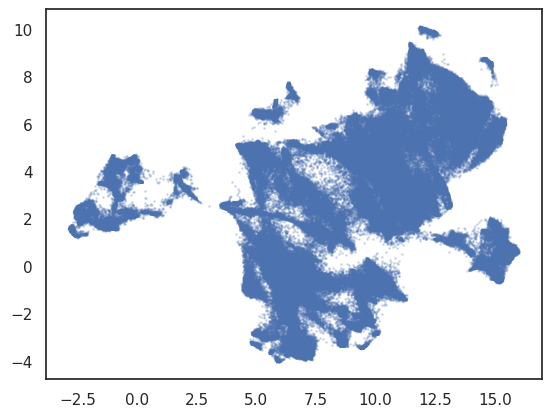

In [20]:
# plot umap
umap = UMAP()
umap_embedding = umap.fit_transform(df)

# plot pca instead
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# umap_embedding = pca.fit_transform(df)

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], alpha=0.2, s=1)


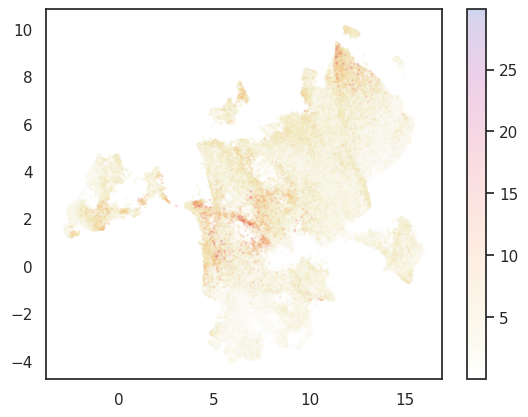

In [21]:
# plot umap

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], alpha=0.2, s=1, 
            c = predictive_variance, cmap=cc.cm.CET_L17,)
# show bar
plt.colorbar()

<Axes: >

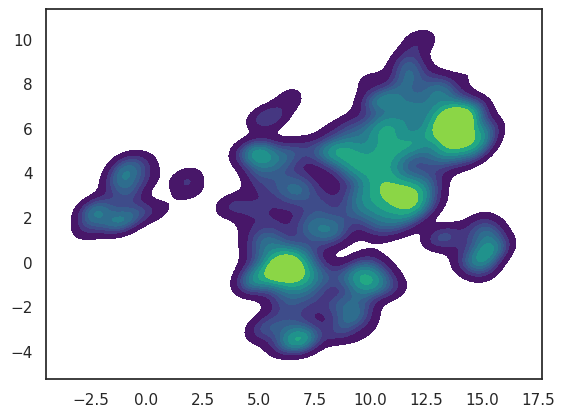

In [22]:
# seaborn kde plot

sns.kdeplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], fill=True, cmap="viridis")

<Axes: >

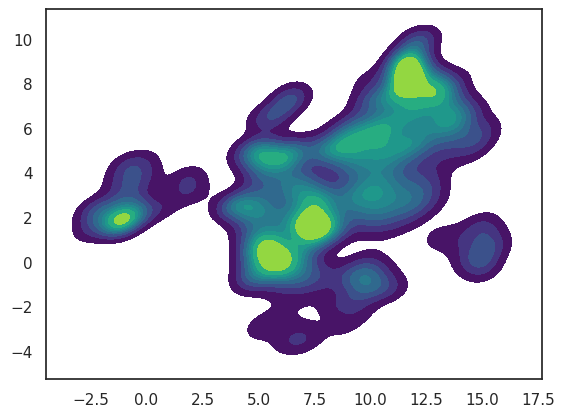

In [23]:
# kde weight by predictive variance

sns.kdeplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], fill=True, cmap="viridis", 
            weights=predictive_variance)

<Axes: >

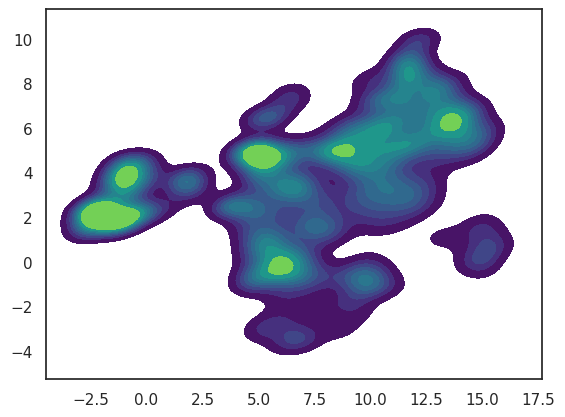

In [24]:
# weight by pred result

agg_pred_res = mean_pred_res.mean(axis=1)
# normalize
agg_pred_res = (agg_pred_res - agg_pred_res.min()) / (agg_pred_res.max() - agg_pred_res.min())
sns.kdeplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], fill=True, cmap="viridis", weights=agg_pred_res)

<Axes3D: >

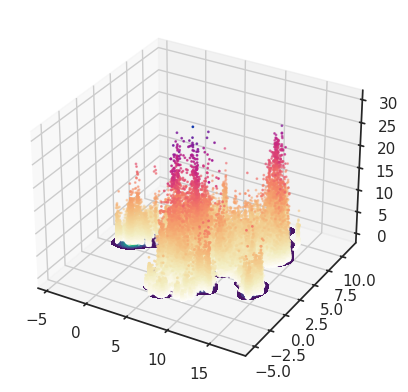

In [25]:
# 3d plot for kde
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], predictive_variance, c=predictive_variance, cmap=cc.cm.CET_L17, s=1)

# plot the kde in 3d
sns.kdeplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], fill=True, cmap="viridis", weights=predictive_variance)


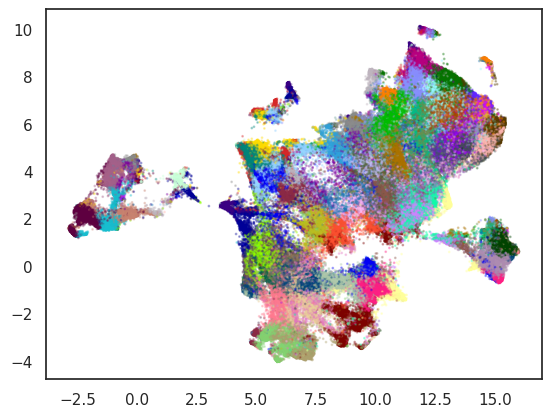

In [26]:
# kmeans clustering with cuml

N = 64

# kmeans = KMeans(n_clusters=N)
# kmeans.fit(df)

kmeans = cuKMeans(n_clusters=N)
kmeans.fit(df)

colors = kmeans.labels_

# map to palette
palette = sns.color_palette(cc.glasbey_hv, n_colors=N )
colors = [palette[i] for i in colors]

# plot kmeans
sns.set_theme(style="white")
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], 
            color=colors, alpha=0.3, s=1,)

In [27]:
mean_pred_res.mean(axis=1).reset_index()

smi_name         0
0       C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)C)C(CCCCCC)CC... -0.542246
1       C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)C)C(CCCCCC)CC... -0.851820
2       C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)C)C(CCCCCC)CC... -0.520204
3       C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)CC(C)(C)C)C(C...  0.566031
4       C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)CC(C)(C)C)C(C... -0.690739
...                                                   ...       ...
221179  CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=... -0.184746
221180  CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=... -0.048793
221181  CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=...  0.551098
221182  CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=...  0.351574
221183  CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=...  0.200752

[221184 rows x 2 columns]

In [28]:

N=10000
query_index = mean_pred_res.mean(axis=1).reset_index().sort_values(ascending=False,by=0).head(N).index
diversity_sample_idx = sampling(96, kmeans.labels_, query_index)


selected_idx: 118967 from cluster 3; cluster size: 1
selected_idx: 122777 from cluster 10; cluster size: 1
selected_idx: 184997 from cluster 13; cluster size: 1
selected_idx: 218057 from cluster 14; cluster size: 1
selected_idx: 125453 from cluster 20; cluster size: 1
selected_idx: 180596 from cluster 39; cluster size: 1
selected_idx: 162978 from cluster 42; cluster size: 1
selected_idx: 192161 from cluster 47; cluster size: 1
selected_idx: 11021 from cluster 52; cluster size: 1
selected_idx: 203724 from cluster 54; cluster size: 1
selected_idx: 180737 from cluster 56; cluster size: 1
selected_idx: 185030 from cluster 58; cluster size: 1
selected_idx: 191514 from cluster 1; cluster size: 3
selected_idx: 154769 from cluster 23; cluster size: 3
selected_idx: 122825 from cluster 40; cluster size: 3
selected_idx: 74605 from cluster 62; cluster size: 3
selected_idx: 130313 from cluster 59; cluster size: 5
selected_idx: 123821 from cluster 0; cluster size: 6
selected_idx: 154994 from cluster

In [29]:
structures = mean_pred_res.iloc[diversity_sample_idx].index
plot_sankey(structures)

In [30]:
# get cluster size
cluster_size = np.bincount(kmeans.labels_)
cluster_size

array([4318, 3720, 2831, 3891, 2430, 3787, 5577, 2119, 3382, 3570, 4205,
       3048, 2242, 3445, 5387, 4379, 4315, 3535, 2842, 2777, 6107, 2585,
       3281, 4231, 3193, 2551, 3029, 4329, 3057, 3983, 3337, 3591, 4852,
       2248, 4161, 3230, 3042, 2882, 3720, 3578, 3546, 4843, 3798, 2858,
       3939, 3983, 3698, 2416, 3412, 4421, 1780, 1480, 3896, 2741, 4114,
       2052, 3473, 3585, 3778, 2799, 3613, 3057, 2523, 2592])

In [31]:
predictive_variance.reset_index()

smi_name         0
0       C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)C)C(CCCCCC)CC...  0.066818
1       C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)C)C(CCCCCC)CC...  0.344520
2       C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)C)C(CCCCCC)CC...  0.133740
3       C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)CC(C)(C)C)C(C...  0.135294
4       C#CCCCCCCCCC(=O)N(C(C(=O)NC(C)(C)CC(C)(C)C)C(C...  0.254046
...                                                   ...       ...
221179  CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=...  1.207318
221180  CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=...  0.627313
221181  CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=...  1.792802
221182  CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=...  2.862824
221183  CCCCCCCCCCOC(=O)CCCCC(=O)N(c1nccs1)C(CCCCCOC(=...  2.095227

[221184 rows x 2 columns]

In [32]:
# top 96 most variable samples
top_96_var = predictive_variance.sort_values(ascending=False).head(96).index
structures = mean_pred_res.loc[top_96_var].index
plot_sankey(structures)


In [33]:
sampled_N = 10000

query_idx = predictive_variance.reset_index().sort_values(ascending=False, by=0).head(sampled_N).index

sample_res = sampling(96, kmeans.labels_, query_idx)

print(sample_res)


selected_idx: 153874 from cluster 17; cluster size: 2
selected_idx: 215153 from cluster 41; cluster size: 2
selected_idx: 75408 from cluster 49; cluster size: 3
selected_idx: 75559 from cluster 14; cluster size: 8
selected_idx: 109868 from cluster 54; cluster size: 14
selected_idx: 33672 from cluster 6; cluster size: 16
selected_idx: 123341 from cluster 20; cluster size: 16
selected_idx: 162230 from cluster 56; cluster size: 16
selected_idx: 101731 from cluster 55; cluster size: 17
selected_idx: 48574 from cluster 47; cluster size: 18
selected_idx: 697 from cluster 53; cluster size: 19
selected_idx: 3646 from cluster 58; cluster size: 20
selected_idx: 46618 from cluster 44; cluster size: 21
selected_idx: 945 from cluster 16; cluster size: 22
selected_idx: 53536 from cluster 19; cluster size: 24
selected_idx: 149574 from cluster 57; cluster size: 28
selected_idx: 115427 from cluster 0; cluster size: 29
selected_idx: 110563 from cluster 24; cluster size: 30
selected_idx: 154791 from clus

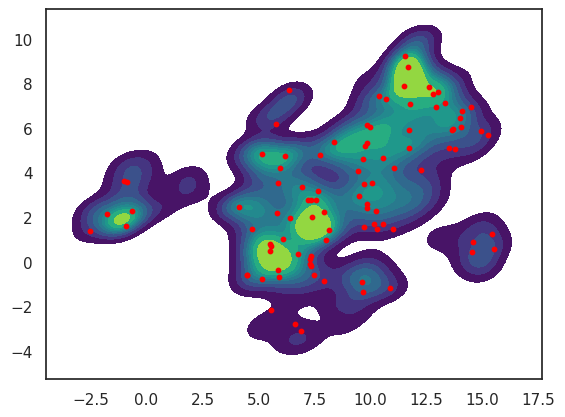

In [34]:
# kde weight by predictive variance

sns.kdeplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], fill=True, cmap="viridis", 
            weights=predictive_variance)

# overlay the selected points
plt.scatter(umap_embedding[sample_res, 0], umap_embedding[sample_res, 1], s=10, c="red")

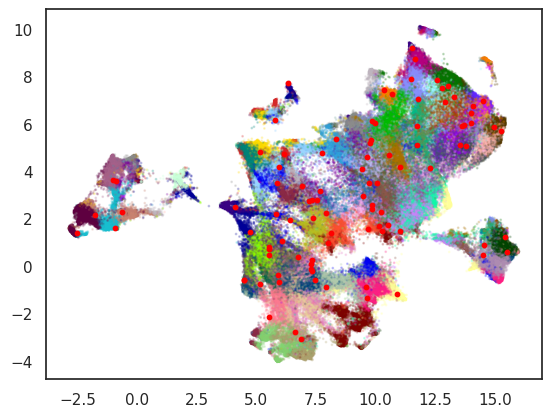

In [35]:
# plot kmeans
sns.set_theme(style="white")
colors = kmeans.labels_
# map to palette
palette = sns.color_palette(cc.glasbey_hv, n_colors=N )
colors = [palette[i] for i in colors]

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], 
            color=colors, alpha=0.2, s=1,)

plt.scatter(umap_embedding[sample_res, 0], umap_embedding[sample_res, 1], s=10, c="red")

/home/sdl/miniconda3/envs/unimol/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



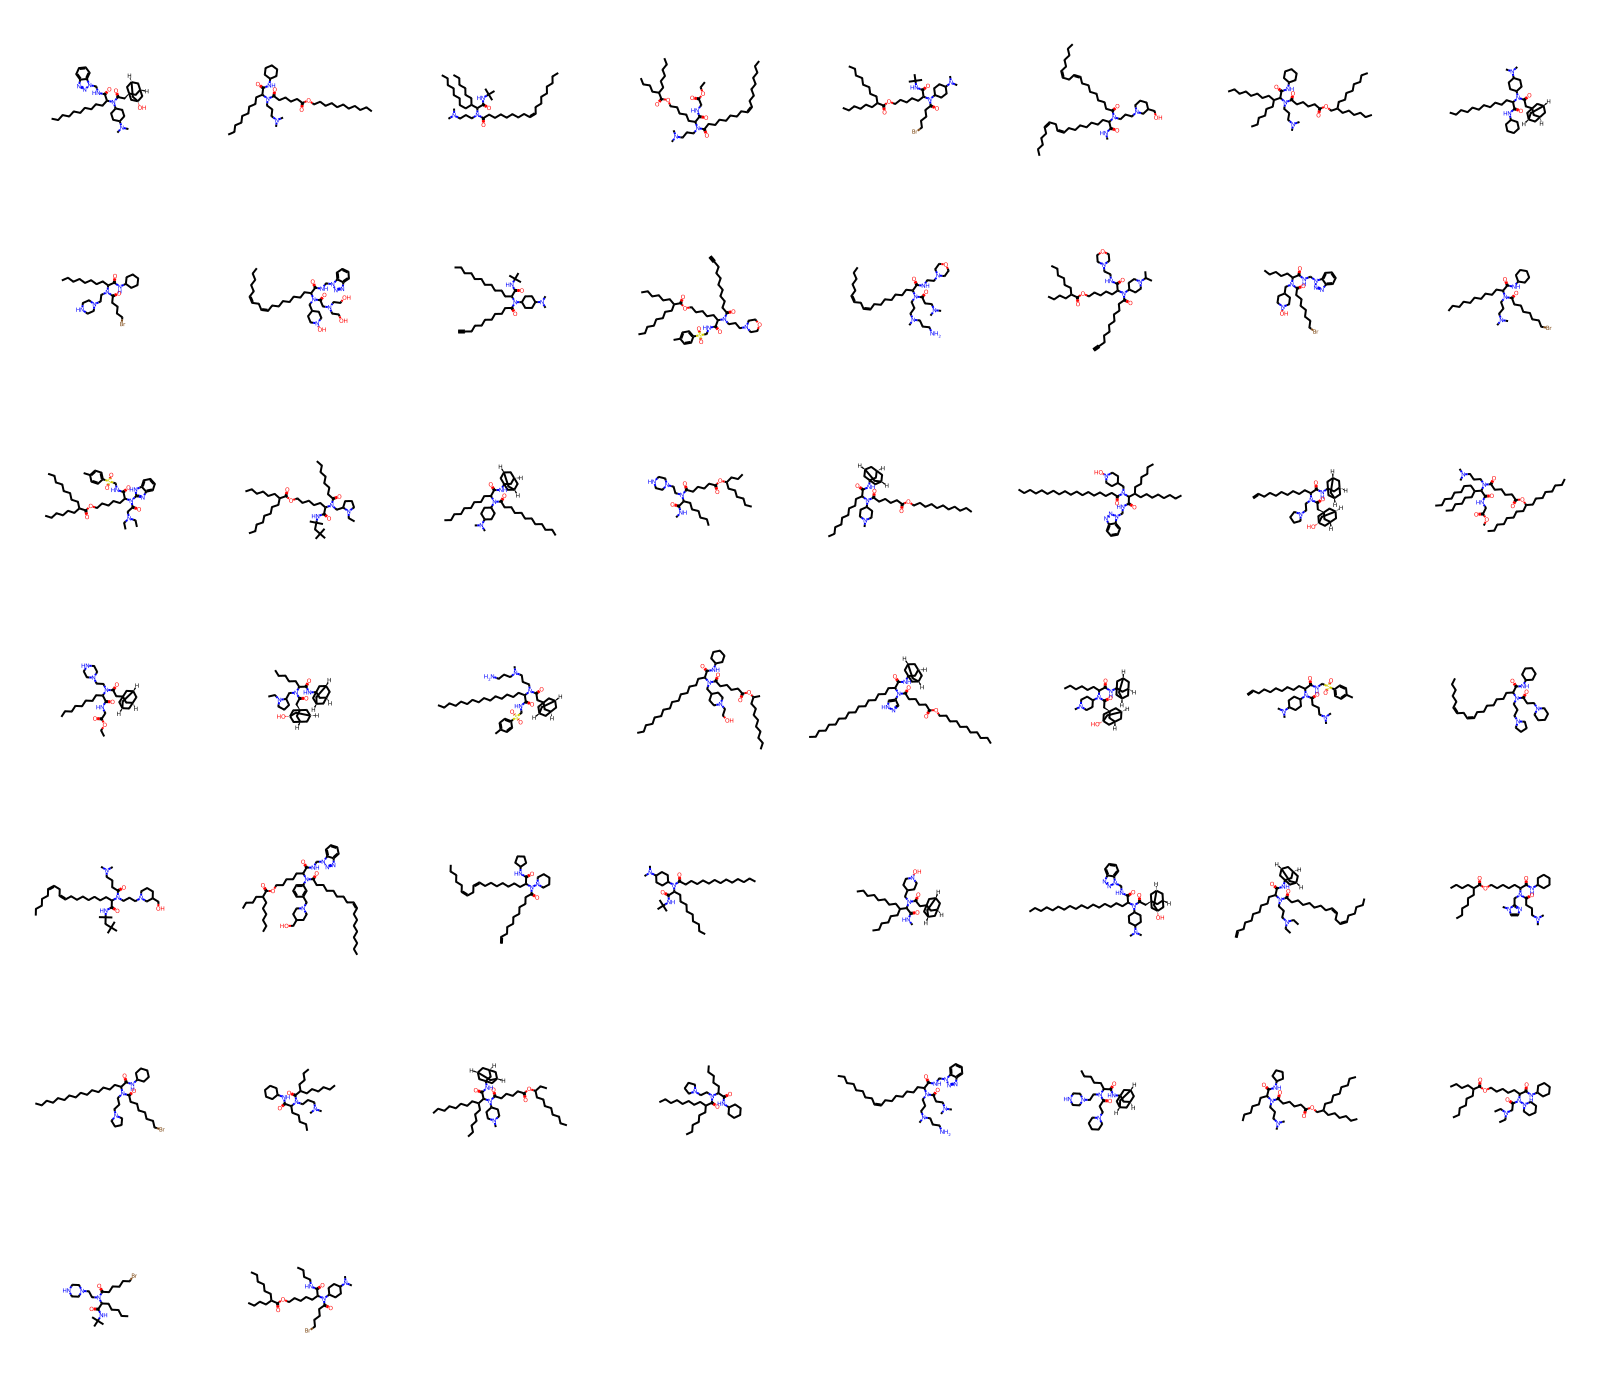

In [36]:
# get structures for the selected points

structures = mean_pred_res.iloc[sample_res].index
structures

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

# draw the structures, structures is a list of smiles
mols = [Chem.MolFromSmiles(smi) for smi in structures]

Draw.MolsToGridImage(mols, molsPerRow=8, subImgSize=(200, 200))

In [37]:
_, count_table = count_components(structures)
count_table



reagent_name  count
0                  C1438     25
1                  D4288     18
2                  D0790     18
3                  I0824     16
4   2-hexyldecanoic acid     14
..                   ...    ...
78                 P2523      1
79                 P1145      1
80                 P0952      1
81                 D1078      1
82           E0144+A0161      1

[83 rows x 2 columns]

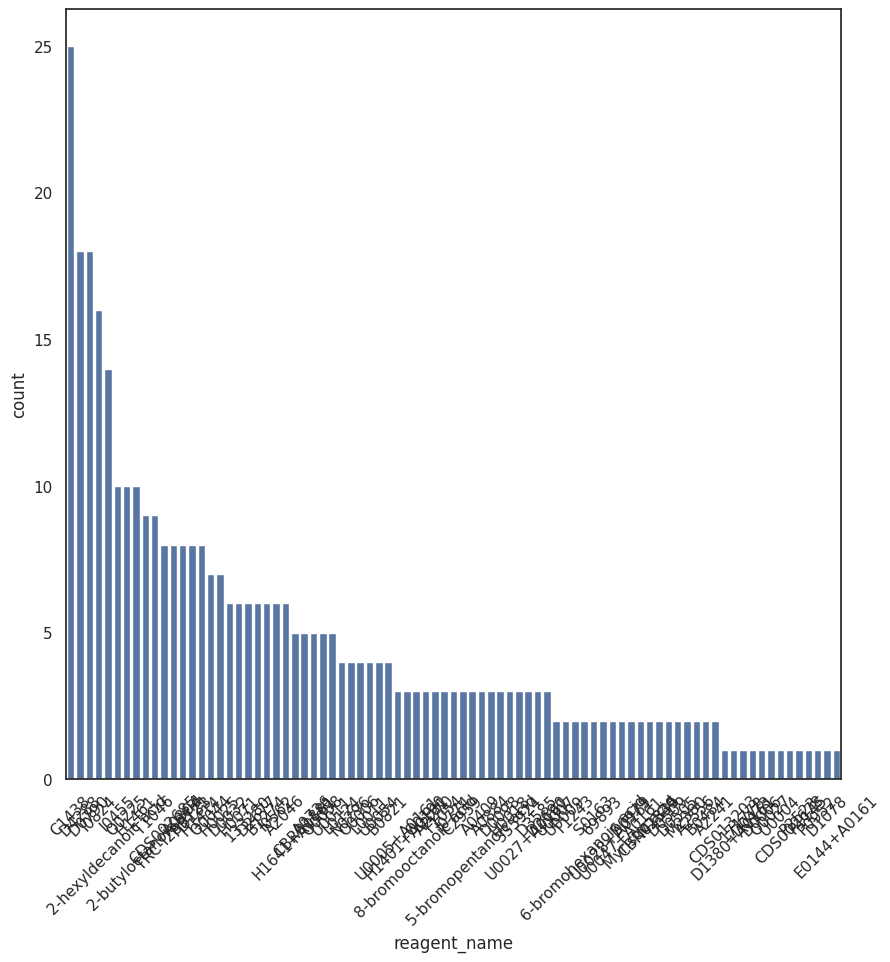

In [38]:
plt.figure(figsize=(10, 10))
sns.barplot(data=count_table, x="reagent_name", y="count")
# rotate x label
plt.xticks(rotation=45)
None

In [39]:
plot_sankey(structures)